
Case 1: Severe Symptoms


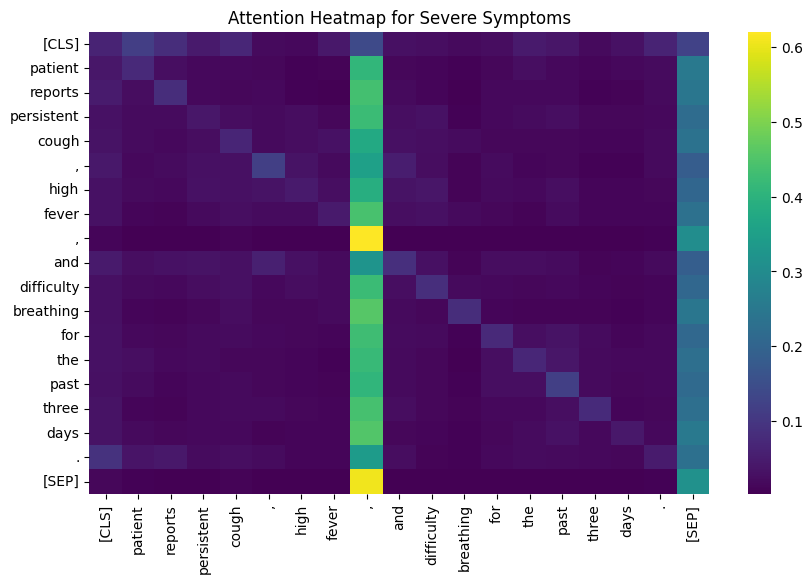


Case 2: Mild Symptoms


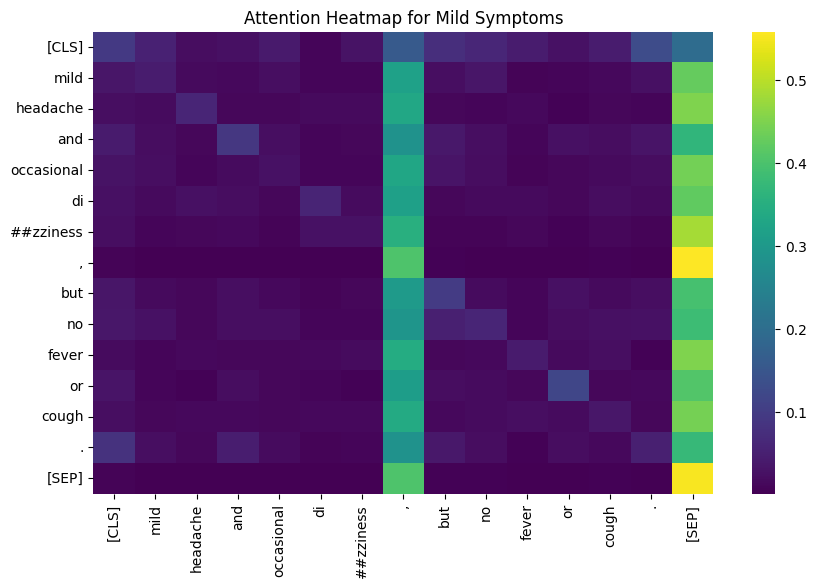


Case 3: Rare but Critical Symptoms


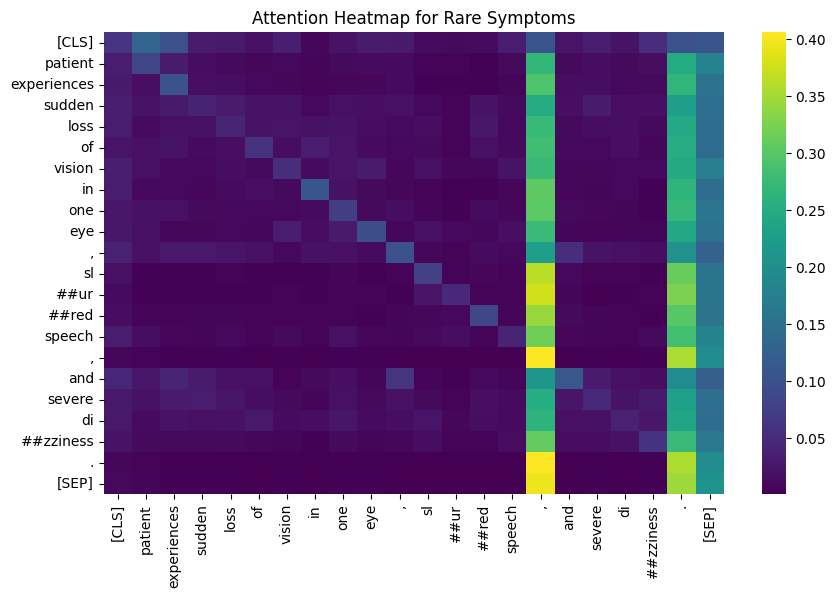

In [7]:
# Import Required Libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel

# Load BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

# Function to Get Attention Scores
def get_attention_scores(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    attention = outputs.attentions[-1]
    input_ids = inputs["input_ids"]
    tokens = tokenizer.convert_ids_to_tokens(input_ids.squeeze())
    return attention, input_ids, tokens

# Function to Plot Attention Heatmap
def plot_attention_heatmap(text, title="Attention Heatmap"):
    attention, input_ids, tokens = get_attention_scores(text)
    attn_matrix = attention.squeeze().mean(dim=0).detach().numpy()

    plt.figure(figsize=(10, 6))
    sns.heatmap(attn_matrix, xticklabels=tokens, yticklabels=tokens, cmap="viridis", annot=False)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()



# Test Cases

# Case 1: Severe Symptoms
text1 = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
print("\nCase 1: Severe Symptoms")
plot_attention_heatmap(text1, title="Attention Heatmap for Severe Symptoms")

# Case 2: Mild Symptoms
text2 = "Mild headache and occasional dizziness, but no fever or cough."
print("\nCase 2: Mild Symptoms")
plot_attention_heatmap(text2, title="Attention Heatmap for Mild Symptoms")


# Case 3: Rare Symptoms
text3 = "Patient experiences sudden loss of vision in one eye, slurred speech, and severe dizziness."
print("\nCase 3: Rare but Critical Symptoms")
plot_attention_heatmap(text3, title="Attention Heatmap for Rare Symptoms")

